# Problem a)

[584, 591, 590, 578, 594, 598, 597, 600]


<Container object of 8 artists>

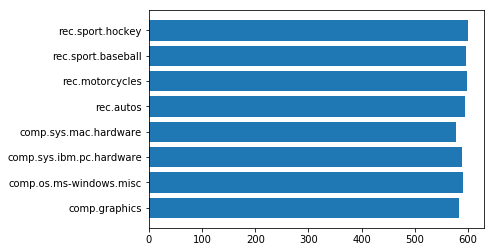

In [2]:
from sklearn.datasets import fetch_20newsgroups
import matplotlib.pyplot as plt
import numpy as np


categories =['comp.graphics','comp.os.ms-windows.misc','comp.sys.ibm.pc.hardware','comp.sys.mac.hardware','rec.autos','rec.motorcycles','rec.sport.baseball','rec.sport.hockey']
dataLen = []
train_datas =[]
for cat in categories:
    raw_train = fetch_20newsgroups(subset='train',categories = [cat],shuffle=True, random_state =42)
    train_datas.append(raw_train.data)
    dataLen.append(len(raw_train.data))
print(dataLen)
# the histogram of the data
plt.barh(categories,dataLen)

# Problem b)

### Stopping words

In [1]:
# tokenize -> stem -> remove punctuation & stop words
import numpy as np
import nltk
import matplotlib.pyplot as plt
from pickle import dump

from sklearn.feature_extraction import text
stop_words_skt = text.ENGLISH_STOP_WORDS
from nltk.corpus import stopwords
nltk.download('stopwords' )
stop_words_en = stopwords.words('english')
from string import punctuation
combined_stopwords = set.union(set(stop_words_en),set(punctuation),set(stop_words_skt))



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shuangyu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### lemmatizer

In [2]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk import pos_tag
#nltk.download('punkt')#, if you need "tokenizers/punkt/english.pickle", choose it
# nltk.download('averaged_perceptron_tagger')
wnl = nltk.wordnet.WordNetLemmatizer()

def penn2morphy(penntag):
    """ Converts Penn Treebank tags to WordNet. """
    morphy_tag = {'NN':'n', 'JJ':'a',
                  'VB':'v', 'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n' 
def lemmatize_sent_demo(text): 
    # Text input is string, returns array of lowercased strings(words).
    return [wnl.lemmatize(word.lower(), pos=penn2morphy(tag)) 
            for word, tag in pos_tag(nltk.word_tokenize(text))]
def lemmatize_sent(list_word): 
    # Text input is string, returns array of lowercased strings(words).
    return [wnl.lemmatize(word.lower(), pos=penn2morphy(tag)) 
            for word, tag in pos_tag(list_word)]
# lemmatize_sent('He is walking to school')

[nltk_data] Downloading package punkt to /Users/shuangyu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/shuangyu/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/shuangyu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['h',
 'e',
 ' ',
 'i',
 's',
 ' ',
 'w',
 'a',
 'l',
 'k',
 'i',
 'n',
 'g',
 ' ',
 't',
 'o',
 ' ',
 's',
 'c',
 'h',
 'o',
 'o',
 'l']

In [3]:
# overwrite analyzer with callable function:
from sklearn.feature_extraction.text import CountVectorizer
analyzer = CountVectorizer().build_analyzer()
def stemmed_words(doc):
    return (stemmer.stem(w) for w in analyzer(doc))
def stem_rmv_punc(doc):
    return (word for word in lemmatize_sent(analyzer(doc)) if word not in combined_stopwords and not word.isdigit())

In [4]:
# tokenize -> stem -> remove punctuation & stop words
import numpy as np
import matplotlib.pyplot as plt
from pickle import dump

from sklearn.datasets import fetch_20newsgroups
comp_categories = [ 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware']
rec_categories = ['rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']
twenty_train = fetch_20newsgroups(subset='train', categories=comp_categories+rec_categories, shuffle=True, random_state=42,)
twenty_test = fetch_20newsgroups(subset='test', categories=comp_categories+rec_categories, shuffle=True, random_state=42,)
counts = []

### TFxIDF

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
min_dfs = [2,5]   
def TF_builder(min_df,twenty_train,twenty_test):
    count_vect = CountVectorizer(min_df=min_df,analyzer=stem_rmv_punc)
    X_train_counts = count_vect.fit_transform(twenty_train)
    X_test_counts = count_vect.transform(twenty_test)
    return X_train_counts,X_test_counts

for min_df in min_dfs[1]
    X_train_counts,X_test_counts = TF_builder(min_df,twenty_train.data,twenty_test.data)
    print(X_train_counts.shape, X_test_counts.shape) 

(4732, 12640) (3150, 12640)


In [30]:
#TDIDF of 8 classes
from sklearn.feature_extraction.text import TfidfTransformer

def TFIDF_builder(X_train_counts1,X_test_counts1 ):
    tfidf_transformer = TfidfTransformer()
    train_tfidf = tfidf_transformer.fit_transform(X_train_counts1)
    test_tfidf = tfidf_transformer.transform(X_test_counts1)
    return train_tfidf,test_tfidf

train_tfidf,test_tfidf = TFIDF_builder(X_train_counts, X_test_counts)

# probelm c)

In [9]:
#TFICF 
all_category = ['comp.sys.ibm.pc.hardware','comp.sys.mac.hardware','misc.forsale','soc.religion.christian','alt.atheism','comp.graphics','comp.os.ms-windows.misc','comp.windows.x','rec.autos','rec.motorcycles','rec.sport.baseball','rec.sport.hockey','sci.crypt','sci.electronics','sci.med','sci.space','talk.politics.guns','talk.politics.mideast','talk.politics.misc','talk.religion.misc']
new_bigstring_class = []
for cat in all_category:
    new_train = fetch_20newsgroups(subset='train',categories = [cat], shuffle=True, random_state =42)
    #stem
    new_bigstring_class.append(" ".join(new_train.data))
# print(len(new_bigstring_class))
count_vect_class = CountVectorizer(min_df=min_dfs[1],analyzer=stem_rmv_punc)
new_tf_class= count_vect_class.fit_transform(new_bigstring)
print(new_tf_class.shape)
tfdif_transformer = TfidfTransformer()
train_tficf = tfidf_transformer.fit_transform(new_tf_class)

In [10]:
print(new_count.shape)

(4, 1759)


In [11]:
# find the top 10
new_sort = train_tficf.toarray()
#print(type(new_sort))
index=[]
i = 0
for termCount in new_sort:
    termCount.sort()
    index.append(np.argwhere(train_tficf.toarray()[i]>=termCount[::-1][:10][-1]))
    i+=1
#print not in order
for x in range(4):
    print([count_vect_class.get_feature_names()[i[0]] for i in index[x] ])

['card', 'com', 'controller', 'drive', 'edu', 'ide', 'line', 'organization', 'subject', 'use']
['apple', 'drive', 'edu', 'line', 'mac', 'organization', 'post', 'problem', 'subject', 'use']
['com', 'edu', 'line', 'new', 'offer', 'organization', 'post', 'sale', 'subject', 'university']
['believe', 'edu', 'god', 'know', 'line', 'organization', 'people', 'say', 'subject', 'think']


# Problem d)
functions get LSI and NMF

### LSI

In [44]:

from sklearn.decomposition import TruncatedSVD
def LSI_deduction(train_tfidf,test_tfidf):
    SVD = TruncatedSVD(n_components=50)
    train_LSI = SVD.fit_transform(train_tfidf)
    test_LSI = SVD.transform(test_tfidf)
    return train_LSI,test_LSI

train_LSI,test_LSI = LSI_deduction(train_tfidf,test_tfidf)
print(train_LSI.shape)
print(test_LSI.shape)



(4732, 50)
(3150, 50)


### NMF

In [99]:
#NMF
from sklearn.decomposition import NMF
def NMF_deduction(train_tfidf,test_tfidf):
    model = NMF(n_components=50, init='random', random_state=0)
    train_NMF = model.fit_transform(train_tfidf)
    test_NMF = model.transform(test_tfidf)
    return train_NMF,test_NMF


train_NMF,test_NMF = NMF_deduction(train_tfidf,test_tfidf)
print(train_NMF.shape)
print(test_NMF.shape)

(4732, 50)
(3150, 50)


# Problem e) SVM

### ROC plot function

In [74]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score

In [75]:
def plot_roc(fpr, tpr):
    fig, ax = plt.subplots()

    roc_auc = auc(fpr,tpr)

    ax.plot(fpr, tpr, lw=2, label= 'area under curve = %0.4f' % roc_auc)

    ax.grid(color='0.7', linestyle='--', linewidth=1)

    ax.set_xlim([0, 1.1])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate',fontsize=15)
    ax.set_ylabel('True Positive Rate',fontsize=15)

    ax.legend(loc="lower right")

    for label in ax.get_xticklabels()+ax.get_yticklabels():
        label.set_fontsize(15)

def fit_predict_and_plot_roc(pipe, train_data, train_label, test_data, test_label):
    pipe.fit(train_data, train_label)
    # pipeline1.predict(twenty_test.data)

    prob_score = pipe.predict_proba(test_data)

    fpr, tpr, _ = roc_curve(test_label, prob_score[:,1])

    plot_roc(fpr, tpr)
    return pipe

def print_result(train_label, predicted_label):   
    print("Confusion_matrix is \n", confusion_matrix(train_label,predicted_label))
    print("Accuracy is \n",accuracy_score(train_label,predicted_label))
    print("Recall score is \n", recall_score(train_label,predicted_label,average='macro'))
    print("Precision score is \n", precision_score(train_label,predicted_label,average='macro'))

In [76]:
# try plot with pipe


# from sklearn.pipeline import Pipeline
# pipeline_svm_hard = Pipeline([
#     ('vect', CountVectorizer(min_df=5,analyzer=stem_rmv_punc)),
#     ('tfidf', TfidfTransformer()),
#     ('reduce_dim', NMF(n_components=50, init='random', random_state=0)),
#     ('clf', svm.SVC(probability=True,C = 1000)),
# ])

# Pipe_svm_hard = fit_predict_and_plot_roc(pipeline_svm_hard, twenty_train.data, twenty_train.target>3, twenty_test.data, twenty_test.target>3)
# # Calculate confusion matrix && accuracy && recall && precision 
# pred = Pipe_svm_hard.predict(twenty_test.data)#########
# print_result(twenty_test.target>3,pred)



### hard svm

Confusion_matrix is 
 [[1498   62]
 [  44 1546]]
Accuracy is 
 0.9663492063492064
Recall score is 
 0.9662917271407838
Precision score is 
 0.9664542075614146


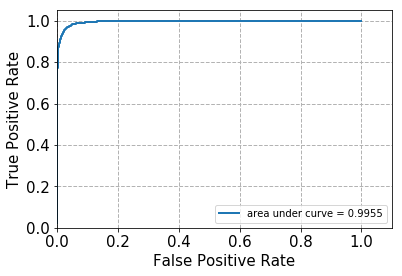

In [113]:
clf_SVM_hard = svm.SVC(kernel='linear', probability=True,C = 1000)
clf_SVM_hard.fit(train_LSI, twenty_train.target>3)
pred = clf_SVM_hard.predict(test_LSI)
prob_score = clf_SVM_hard.predict_proba(test_LSI)

print_result(twenty_test.target>3,pred)
fpr, tpr, _ = roc_curve(twenty_test.target>3, prob_score[:,1])
plot_roc(fpr, tpr)

### soft svm 

Confusion_matrix is 
 [[   0 1560]
 [   0 1590]]
Accuracy is 
 0.5047619047619047
Recall score is 
 0.5
Precision score is 
 0.2523809523809524


/Users/shuangyu/ECE219_projects/project_1/.env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


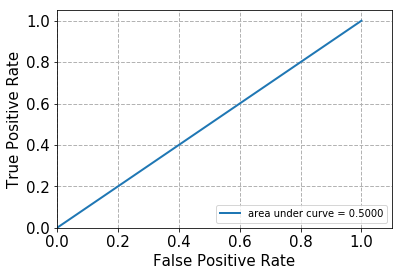

In [114]:
clf_SVM_soft = svm.SVC(kernel='linear', probability=True,C = 0.001)
clf_SVM_soft.fit(train_LSI, twenty_train.target>3)
pred = clf_SVM_soft.predict(test_LSI)
prob_score = clf_SVM_soft.predict_proba(test_LSI)

print_result(twenty_test.target>3,pred)
fpr, tpr, _ = roc_curve(twenty_test.target>3, prob_score[:,1])
plot_roc(fpr, tpr)

# Problem f) cross validation
find the best Gammaby 

In [127]:
from sklearn.model_selection import KFold
ks = list(range(-3,4))
#Kfold
kf = KFold(n_splits=5)

for train_index, test_index in kf.split(twenty_train.data):

    data_train = np.array(twenty_train.data)[train_index]
    data_test = np.array(twenty_train.data)[test_index]

    target_train = np.array(twenty_train.target)[train_index]
    target_test = np.array(twenty_train.target)[test_index]

    data_train_counts,data_test_counts = TF_builder(5, data_train,data_test)
    data_train_tfidf,data_test_tfidf = TFIDF_builder(data_train_counts,data_test_counts)
    
    data_train_NMF,data_test_NMF = NMF_deduction(data_train_tfidf,data_test_tfidf)
    
    for k in ks:
        print("-"*10,"k =",k,"-"*10)
        clf_SVM = svm.SVC(kernel='linear', probability=True,C = 10**k)
        clf_SVM.fit(train_LSI, twenty_train.target>3)
        pred = clf_SVM.predict(test_NMF)
        prob_score = clf_SVM.predict_proba(test_NMF)
        
        print_result(twenty_train.target[test_index]>3,pred)
        
        
    

---------- k = -3 ----------


ValueError: Found input variables with inconsistent numbers of samples: [947, 3150]

# Problem g) Naive Bayes

Confusion_matrix is 
 [[1400  160]
 [  32 1558]]
Accuracy is 
 0.939047619047619
Recall score is 
 0.9386550556361877
Precision score is 
 0.9422610414864627


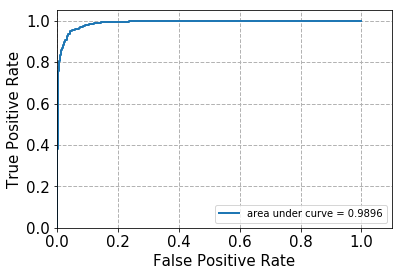

In [103]:
#naive Bayes
from sklearn.naive_bayes import MultinomialNB

# X_train_counts,X_test_counts = TF_builder(min_df,twenty_train.data,twenty_test.data)
# train_tfidf,test_tfidf = TFIDF_builder(X_train_counts, X_test_counts)
# train_NMF,test_NMF = NMF_deduction(train_tfidf,test_tfidf)

clf_NB = MultinomialNB().fit(train_NMF, twenty_train.target>3)
pred = clf_NB.predict(test_NMF)
prob_score = clf_NB.predict_proba(test_NMF)

print_result(twenty_test.target>3,pred)
fpr, tpr, _ = roc_curve(twenty_test.target>3, prob_score[:,1])
plot_roc(fpr, tpr)



# Problem h) Logistic Regression

### L2 Norm

Confusion_matrix is 
 [[1389  171]
 [  42 1548]]
Accuracy is 
 0.9323809523809524
Recall score is 
 0.9319847605224963
Precision score is 
 0.9355867276938106


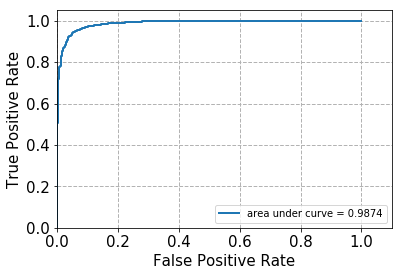

In [104]:
from sklearn.linear_model import LogisticRegression


clf_LR = LogisticRegression().fit(train_NMF, twenty_train.target>3)
pred = clf_LR.predict(test_NMF)
prob_score = clf_LR.predict_proba(test_NMF)

print_result(twenty_test.target>3,pred)
fpr, tpr, _ = roc_curve(twenty_test.target>3, prob_score[:,1])
plot_roc(fpr, tpr)

# Problem I) Logistic Regression with regularization 

### L1 Norm with regulization 

In [109]:
Cs = list(range(-3,4))
for C in Cs:
    print('-'*8,"C=",C,"-"*8)
    clf_LR = LogisticRegression(penalty='l1', C = 10**C).fit(train_NMF, twenty_train.target>3)
    pred = clf_LR.predict(test_NMF)
    prob_score = clf_LR.predict_proba(test_NMF)
    
    print_result(twenty_test.target>3,pred)
#     fpr, tpr, _ = roc_curve(twenty_test.target>3, prob_score[:,1])
#     plot_roc(fpr, tpr)
    
    

-------- C= -3 --------
Confusion_matrix is 
 [[1560    0]
 [1590    0]]
Accuracy is 
 0.49523809523809526
Recall score is 
 0.5
Precision score is 
 0.24761904761904763
-------- C= -2 --------
Confusion_matrix is 
 [[1560    0]
 [1590    0]]
Accuracy is 
 0.49523809523809526
Recall score is 
 0.5
Precision score is 
 0.24761904761904763
-------- C= -1 --------
Confusion_matrix is 
 [[ 921  639]
 [  70 1520]]
Accuracy is 
 0.7749206349206349
Recall score is 
 0.7731797290759554
Precision score is 
 0.8166969609299817
-------- C= 0 --------
Confusion_matrix is 
 [[1478   82]
 [  39 1551]]
Accuracy is 
 0.9615873015873015
Recall score is 
 0.9614537977745525
Precision score is 
 0.962038517540138
-------- C= 1 --------
Confusion_matrix is 
 [[1487   73]
 [  50 1540]]
Accuracy is 
 0.960952380952381
Recall score is 
 0.9608792936623125
Precision score is 
 0.9611059055389664
-------- C= 2 --------
Confusion_matrix is 
 [[1488   72]
 [  56 1534]]
Accuracy is 
 0.9593650793650793
Recall sco

/Users/shuangyu/ECE219_projects/project_1/.env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Norm l2 with regulization

In [110]:
Cs = list(range(-3,4))
for C in Cs:
    print('-'*8,"C=",C,"-"*8)
    clf_LR = LogisticRegression(penalty='l2', C = 10**C).fit(train_NMF, twenty_train.target>3)
    pred = clf_LR.predict(test_NMF)
    prob_score = clf_LR.predict_proba(test_NMF)
    
    print_result(twenty_test.target>3,pred)

-------- C= -3 --------
Confusion_matrix is 
 [[   0 1560]
 [   0 1590]]
Accuracy is 
 0.5047619047619047
Recall score is 
 0.5
Precision score is 
 0.2523809523809524
-------- C= -2 --------
Confusion_matrix is 
 [[ 229 1331]
 [   0 1590]]
Accuracy is 
 0.5774603174603175
Recall score is 
 0.5733974358974359
Precision score is 
 0.7721670660732626
-------- C= -1 --------
Confusion_matrix is 
 [[1215  345]
 [  22 1568]]
Accuracy is 
 0.8834920634920634
Recall score is 
 0.8825048379293663
Precision score is 
 0.9009350142686237
-------- C= 0 --------
Confusion_matrix is 
 [[1389  171]
 [  42 1548]]
Accuracy is 
 0.9323809523809524
Recall score is 
 0.9319847605224963
Precision score is 
 0.9355867276938106
-------- C= 1 --------
Confusion_matrix is 
 [[1456  104]
 [  48 1542]]
Accuracy is 
 0.9517460317460318
Recall score is 
 0.9515723270440252
Precision score is 
 0.9524508156459244
-------- C= 2 --------
Confusion_matrix is 
 [[1474   86]
 [  56 1534]]
Accuracy is 
 0.95492063492063

/Users/shuangyu/ECE219_projects/project_1/.env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
